In [23]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)



In [24]:

data.columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
data.drop(['Channel', 'Region'], axis=1, inplace=True)  # Drop categorical columns
print("Data Overview:\n", data.head())

Data Overview:
    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

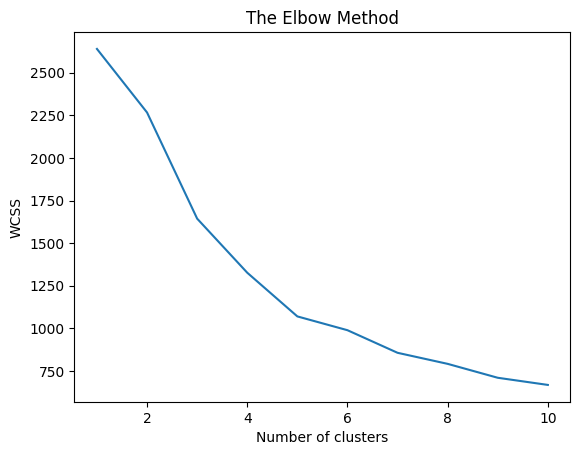

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)  # Choosing 3 clusters
data['Cluster'] = kmeans.fit_predict(X_scaled)

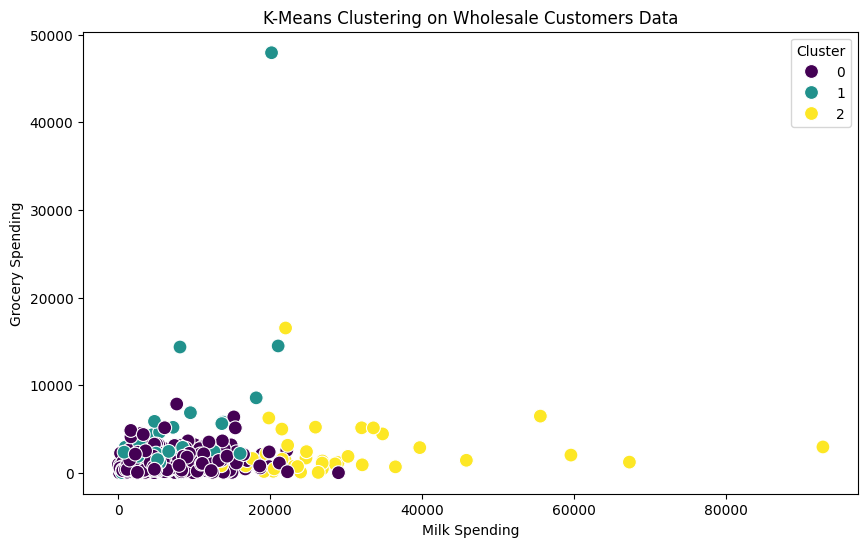

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Grocery'],
    y=data['Delicatessen'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('K-Means Clustering on Wholesale Customers Data')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.legend(title='Cluster')
plt.show()

In [29]:
# Step 7: Display Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print("Cluster Centers:\n", cluster_df)


Cluster Centers:
           Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   8935.500000   4228.528571   5848.034286  2167.231429       1913.605714   
1  34540.113208   5860.358491   6122.622642  9841.735849        981.471698   
2   8704.864865  20534.405405  30466.243243  1932.621622      14758.837838   

   Delicatessen  
0   1102.120000  
1   3664.245283  
2   2459.351351  


In [30]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4582633767207058
